In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

## PairPlot

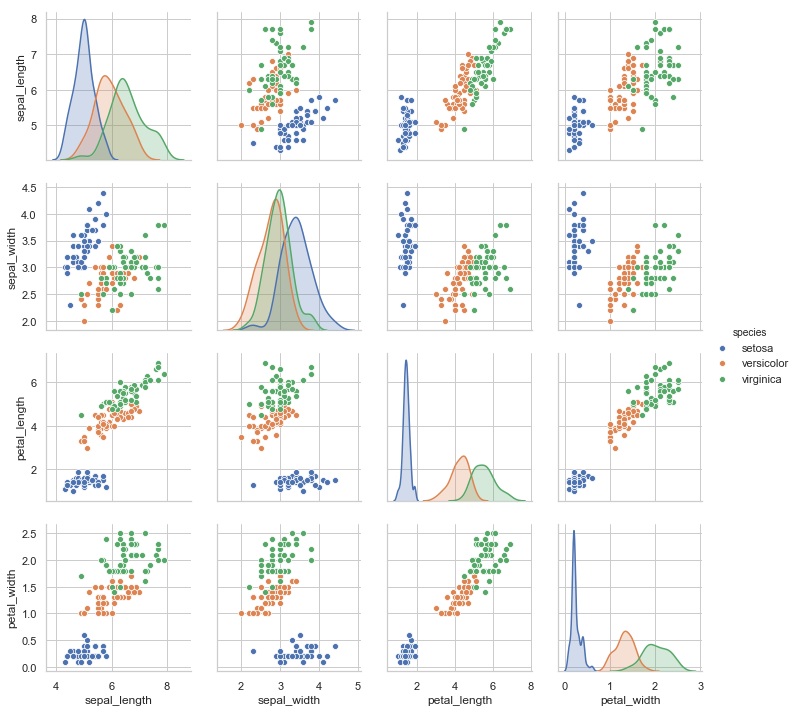

In [35]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")
# g.map(sns.pointplot)

In [6]:
print(type(g))

<class 'seaborn.axisgrid.PairGrid'>


## CatPlot

#### catplot 은 <class 'seaborn.axisgrid.FacetGrid'> 를 사용한다
    주로 "g = " 으로 객체를 따로 받아서 사용한다
    category 변수와, 숫자형변수의 관계를 보여주기 위해서 사용한다.
    col 속성을 이용하면, 변수dim 을 더 확장하여 보여주게 된다 (여러개 그리고 싶을때 핵심)
    내가 선택한 변수관계에 따라서, 자동으로 gird 구조의 subplot을 그려주는 것이 특징
    kind 로 표현하는 그래프 형식을 여러개 바꿀수 있다

In [12]:
# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

In [14]:
titanic.head(3)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True

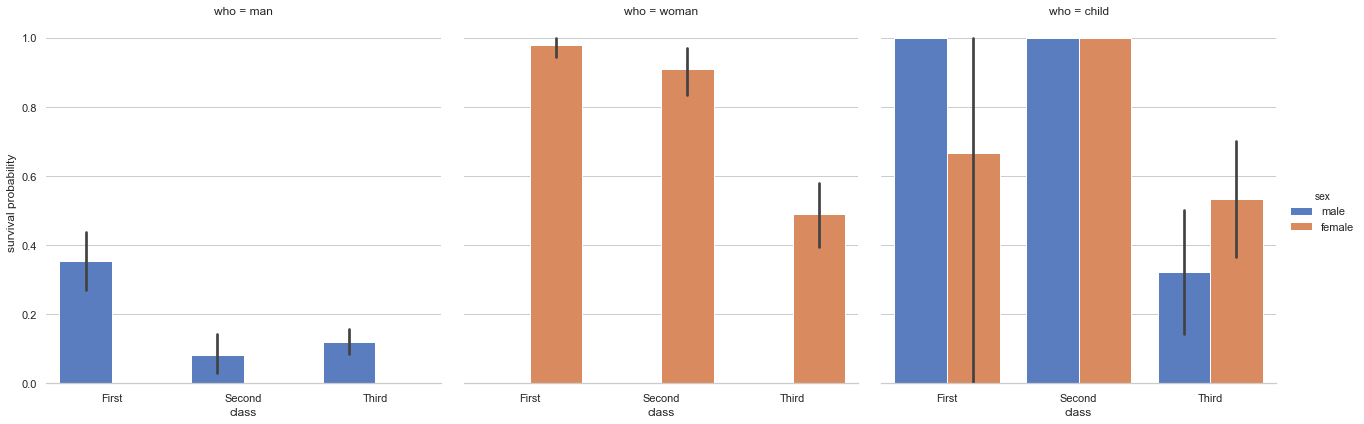

In [31]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex",col="who", data=titanic,height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

In [32]:
print(type(g))

<class 'seaborn.axisgrid.FacetGrid'>


In [23]:
# Load the example exercise dataset
df = sns.load_dataset("exercise")

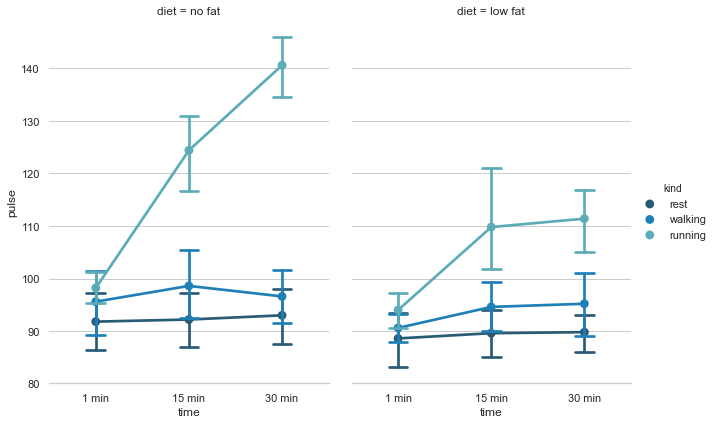

In [26]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="time", y="pulse", hue="kind", col="diet",capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)

## PairGrid

#### PairGrid 는 PairPlot의 불편함을 없애려고 나온것이며, 대각선을 기준으로 위, 아래에 대해 각각의 시각화도구를 적용할 수 있는 점이 가장 큰 차이점이다
    숫자형변수 - 숫자형변수 의 관계를 기본으로 그린다 (default 로 x_vars=None, y_vars = None 일 경우)
    숫자형변수 - 카테고리컬변수 관계도 그릴 수 있으며, (x_vars , y_vars 를 설정하면)
    내가 선택한 변수관계에 따라서, 자동으로 gird 구조의 subplot을 그려주는 것이 특징

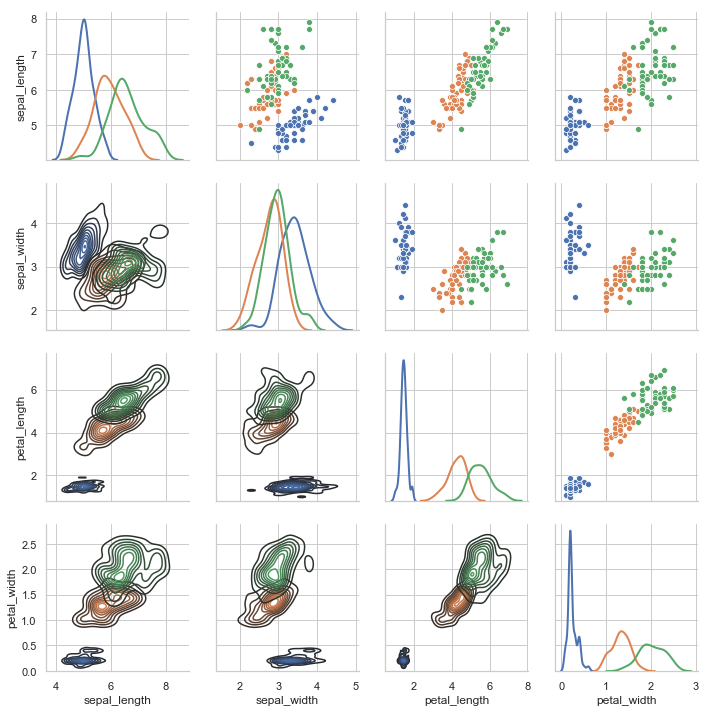

In [42]:
gpg = sns.PairGrid(iris, diag_sharey=False, hue='species')
gpg.map_upper(sns.scatterplot)
gpg.map_lower(sns.kdeplot)
gpg.map_diag(sns.kdeplot, lw=2)

In [41]:
print(type(gpg))

<class 'seaborn.axisgrid.PairGrid'>


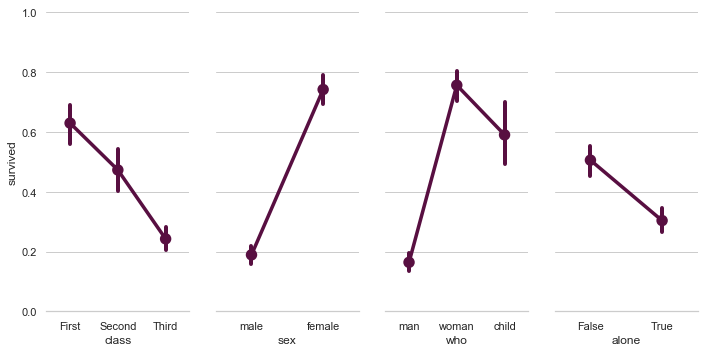

In [43]:
# Set up a grid to plot survival probability against several variables
gtitan = sns.PairGrid(titanic, y_vars="survived",x_vars=["class", "sex", "who", "alone"],height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
gtitan.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
gtitan.set(ylim=(0, 1))
sns.despine(fig=gtitan.fig, left=True)

In [44]:
# Load the dataset
crashes = sns.load_dataset("car_crashes")

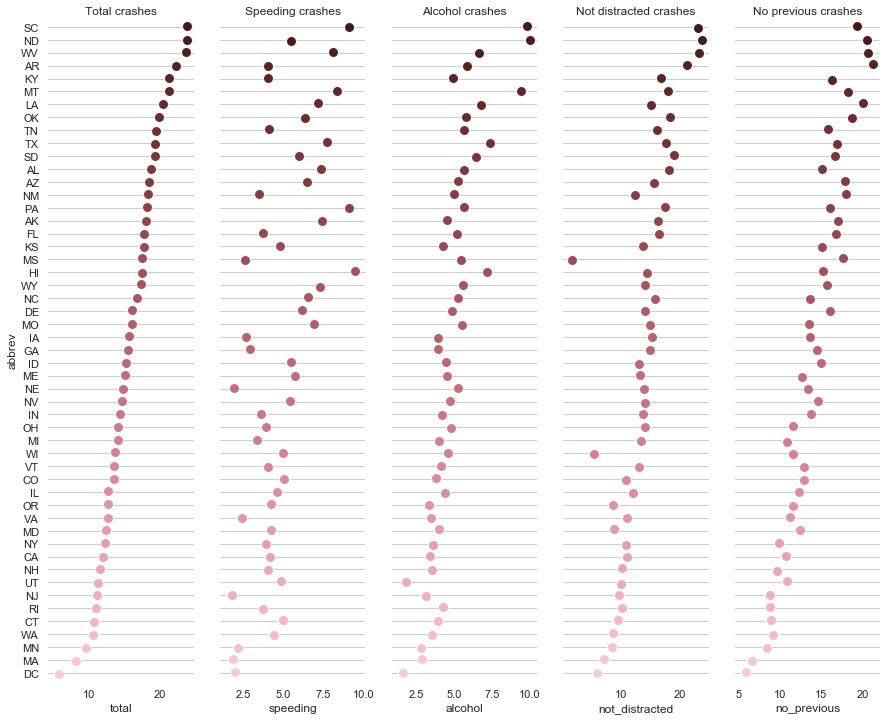

In [48]:
# Make the PairGrid
gcrash = sns.PairGrid(crashes.sort_values("total", ascending=False),x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                      height=10, aspect=.25)

# Draw a dot plot using the stripplot function
gcrash.map(sns.stripplot, size=10, orient="h",palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")
#############################################################################
# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes","Not distracted crashes", "No previous crashes"]
## gcrash.axes 각각의 subplot 변 title 를 붙여주는 과정임
for ax, title in zip(gcrash.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [46]:
gcrash.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF47261F28>,
      dtype=object)